# Estimation of Phone Prices - Data Science project


## Import Libraries
All libraries are used for specific tasks including data preprocessing, visualization, transformation, modeling and evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")




"--------------Business Problem: Estimate the price of a Phone Prices-----------"

## Import Data
### Read Phone Data
The phone prices set is read locally and the **head** function is used to display the data (5 records) for intial understanding

In [18]:
import pandas as pd

phoneprices = pd.read_csv('phone prices.csv')

phoneprices.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,operating_system,wifi,Bluetooth,GPS,Number of SIMs,threeg,fourg,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


The **shape** function displays the number of rows and columns in the phone prices set

In [19]:
phoneprices.shape # check dimension

(1359, 22)

Checking for null values in each column and displaying the sum of all null values in each column

In [20]:
phoneprices.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
operating_system          0
wifi                      0
Bluetooth                 0
GPS                       0
Number of SIMs            0
threeg                    0
fourg                     0
Price                     0
dtype: int64

Removing the rows with empty values since the number of empty rows is small and the dataset is huge. This is the best approach compared to replacing with mean or random values for this case study

In [21]:
phoneprices = phoneprices.dropna()


Checking if null values are eliminated

In [22]:
phoneprices.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
operating_system          0
wifi                      0
Bluetooth                 0
GPS                       0
Number of SIMs            0
threeg                    0
fourg                     0
Price                     0
dtype: int64

In [23]:
phoneprices.shape # 15 rows removed

(1359, 22)

Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.

In [24]:
phoneprices.dtypes  # checking the data type of every column

Unnamed: 0                  int64
Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
operating_system           object
wifi                       object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
threeg                     object
fourg                      object
Price                       int64
dtype: object

Checking the correlation between the numerical features and target


## EDA (Exploratory Data Analysis)
Visualizations are used to understand the relationship between the target variable and the features, in addition to the quantatitave metrics such as correlation coefficient and p-value.
The visuals include regression plot,boxplot etc.


In [17]:
phoneprices.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


## A descriptive analysis to check incorrect entries and anomalies. This is also used to give an overview of the numerical data. It is observed that some data in the dataset could be impure/of low quality as discussed below.

1. Count: The number of values in the dataframe.
2. Mean: The arithmetic mean or average of the values.
3. Standard Deviation (std): A measure of the dispersion or spread of the values.
4. Minimum: The minimum (smallest) value in each column.
5. 25th Percentile (25%): The value below which 25% of the data falls (1st quartile). Means 25% of the entire data falls under the value 2300.000000 for Battery capacity (mAh)
6. 50th Percentile (50%): The median or value below which 50% of the data falls (2nd quartile).
7. 75th Percentile (75%): The value below which 75% of the data falls (3rd quartile).
8. Maximum: The maximum (largest) value in the Series.

#Looking at the "minimum price", below 500 USD is found.
#This could be a wrong entry (or an outlier)




In [25]:
#Search for price = 1 , if so, change the price to 500
phoneprices.loc[phoneprices['Price'] == 1, 'Price'] = 500

In [26]:
phoneprices.describe()  # now still the minimum price is 494 USD which is not an acceptable price

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [27]:
#Search for price < 500 , if so, change the price to 500. This way I make sure that the min proce is 500 USD
phoneprices.loc[phoneprices['Price'] < 500, 'Price'] = 500

In [28]:
phoneprices.describe()  # now the minimum price is 500 USD

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.830022
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.493579
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,500.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [29]:
phoneprices.describe(include = 'object') #summary statistics for categorical values

,Name,Brand,Model,Touchscreen,operating_system,wifi,Bluetooth,GPS,threeg,fourg
count,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
unique,1359,76,1321,2,7,2,2,2,2,2
top,OnePlus 7T Pro McLaren Edition,Intex,V5,Yes,Android,Yes,Yes,Yes,Yes,Yes
freq,1,117,4,1342,1299,1351,1344,1251,1214,1012


### Regression plot
This regression plot show the correlation between **Battery capacity (mAh)** and **price**. A slight negative correlation is observed
which shows that price is being affected by the change in Battery capacity (mAh).

<Axes: xlabel='Battery capacity (mAh)', ylabel='Price'>

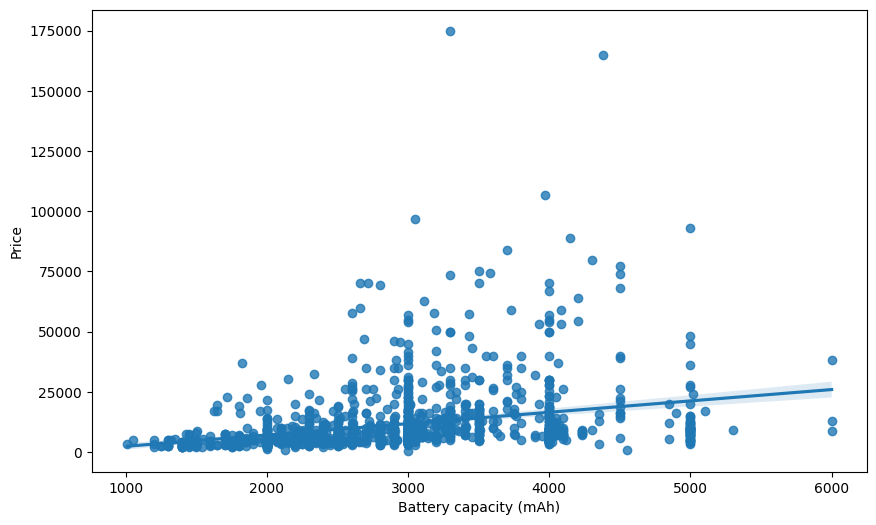

In [30]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Battery capacity (mAh)", y="Price", data=phoneprices)

As observed in the plot above, a **negative correlation** is observed

In [31]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(phoneprices['Battery capacity (mAh)'], phoneprices['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29752527325192135  with a P-value of P = 3.52238057146711e-29


-- Pearson corr coeff of -0.29 is obtained along with a p-value of 3.5.

-- The Pearson Correlation Coefficient (r) is a measure of the linear relationship between two variables. It can take values between -1 and 1

-- If r is close to 1, it indicates a strong positive linear relationship. This means that as one variable increases, the other variable tends to increase as well.

-- If r is close to -1, it indicates a strong negative linear relationship. This means that as one variable increases, the other variable tends to decrease.

-- If r is close to 0, it suggests a weak or no linear relationship. In other words, the variables are not strongly correlated.

-- Here, the Pearson Correlation Coefficient is approximately 0.297, which is closer to 1 than to 0. This indicates a moderate positive linear relationship between the two variables being correlated.

-- The p-value (probablity) is used to determine the statistical significance of the correlation. In other words, how confidently one can say a feature is correlated to the target ariable.

"IMPORTANT:" A P-value More than 1 (commonly used significance level) suggests that the correlation is statistically significant and hence reject the Null hypothesis.

What is my null hypothesis?
H0: The feature variable is correlated to a target variable.

Very important: A P-value of 0.0 means (more confidently say the feature is correlated to target) and that the correlation is extremely unlikely to have occurred by random chance, indicating strong statistical significance.

-- The p value here (that corresponds to Battery capacity (mAh) ) confirms strong correlation, hence this feature is a critical feature to the prediction of Phone prices

The regression plot below shows a relationship between the year that the phone Screen size (inches) and the price of the phone. A positive Correlation is observed between the two variables. This shows that the price increases with an increase in production Screen size inches of the phone.

<Axes: xlabel='Screen size (inches)', ylabel='Price'>

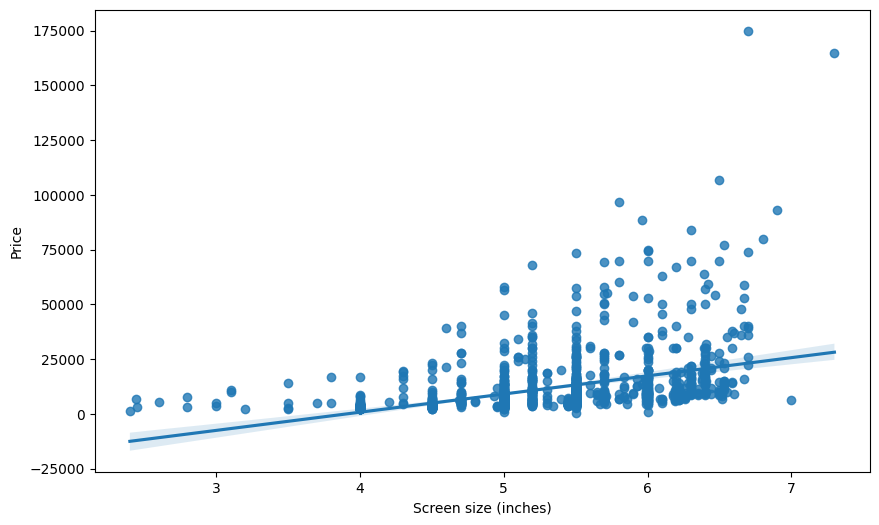

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x="Screen size (inches)", y="Price", data=phoneprices)

As observed above, a high positive


correlation of 0.4 is calculated along with the p-value of 4.5 This indicates that the correlation between the variables is significant hence year produced feature can be used for prediction.

In [33]:
pearson_coef, p_value = stats.pearsonr(phoneprices['Screen size (inches)'], phoneprices['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.40246263242498304  with a P-value of P = 4.5567204568681015e-54


check for correlation between


'Resolution x ' and
'price'

<Axes: xlabel='Resolution x', ylabel='Price'>

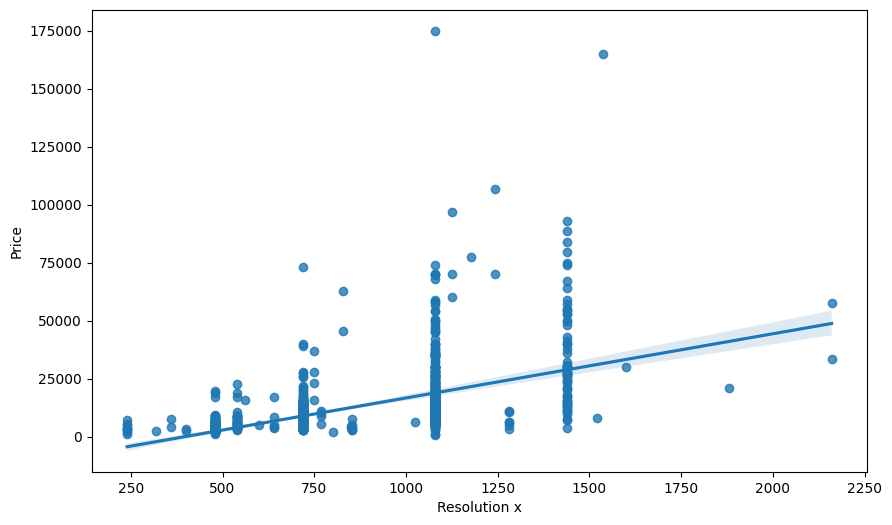

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(x="Resolution x", y="Price", data=phoneprices)

`A 0.5 correlation is calculated which is very larg with a p value of 4.9 This indicates that even though the correlation is large but its 90% of 100 which is not significant hence this feature can be used for predicition.

In [35]:
pearson_coef, p_value = stats.pearsonr(phoneprices['Resolution x'], phoneprices['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5407115318758102  with a P-value of P = 4.963622264088367e-104



check for correlation between 'Resolution y' and 'price'

<Axes: xlabel='Resolution y', ylabel='Price'>

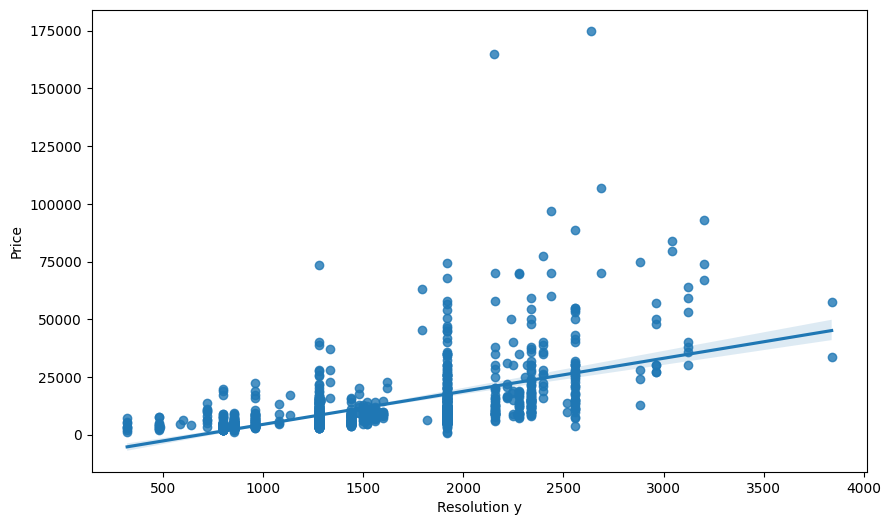

In [36]:
plt.figure(figsize=(10,6))
sns.regplot(x="Resolution y", y="Price", data=phoneprices)

The correlation is 0.57 based on the calculation while the p-value calculated is 5.08, This is equivalent to the last feature and hence not significant by 90 % of 100 correlation making this feature not eligble for prediction along with 5.08 p-value.

In [37]:
pearson_coef, p_value = stats.pearsonr(phoneprices['Resolution y'], phoneprices['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5761525791610103  with a P-value of P = 5.087276459792869e-121


-------check correlation b/w Processor and price-------------


<Axes: xlabel='Processor', ylabel='Price'>

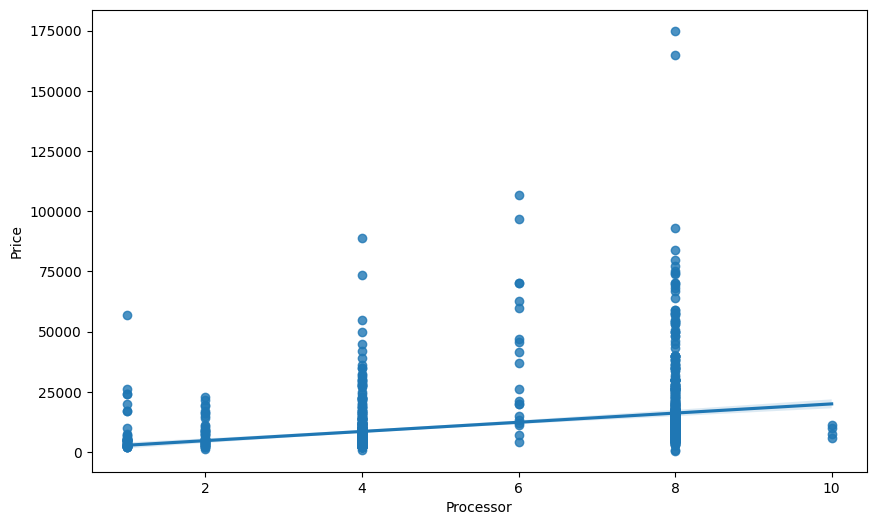

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(x="Processor", y="Price", data=phoneprices)

*The* calculation below proves that the correlation is lesser than 0.1 percent and indicates no correlation and the p-value more than 0.05 confirms it. This feature is not a critical feature for predicition

A P-value less than 0.05 (commonly used significance level) suggests that the correlation is statistically significant and hence reject the Null hypothesis.

What is my null hypothesis?
H0: The processor  is correlated to price.

My alternate hypothesis
HA: The processor is not correlated to price.

In [39]:
pearson_coef, p_value = stats.pearsonr(phoneprices['Processor'], phoneprices['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.30249223828755506  with a P-value of P = 3.755786083619151e-30


*************check correlation between RAM (MB) and price***************



<Axes: xlabel='RAM (MB)', ylabel='Price'>

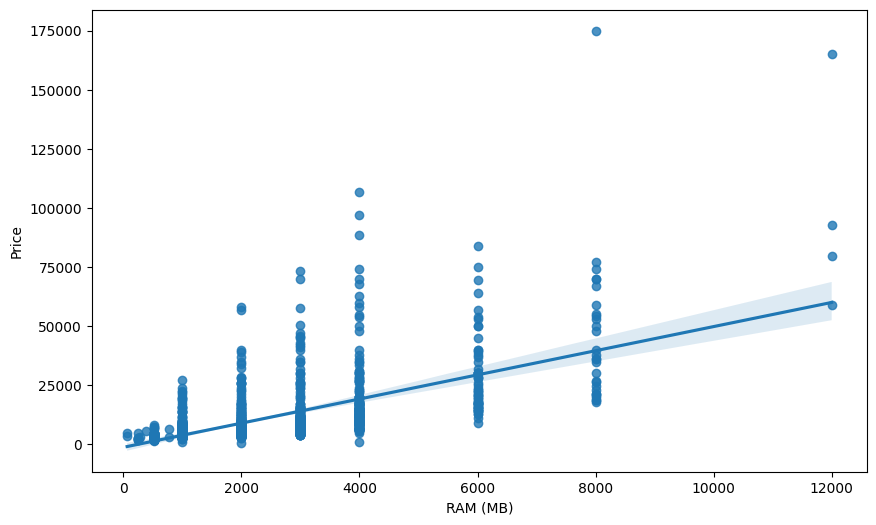

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(x="RAM (MB)", y="Price", data=phoneprices)

In [41]:
pearson_coef, p_value = stats.pearsonr(phoneprices['RAM (MB)'], phoneprices['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6134463399870027  with a P-value of P = 2.694969391755471e-141


**### Box Plot
These plots are used for categorical data to determine the importance of features for prediction.

In the given plot below, it is observed that the price range vary for Brand. This indicates the categories can vary with price hence feature can be used for prediction

<Axes: xlabel='Brand', ylabel='Price'>

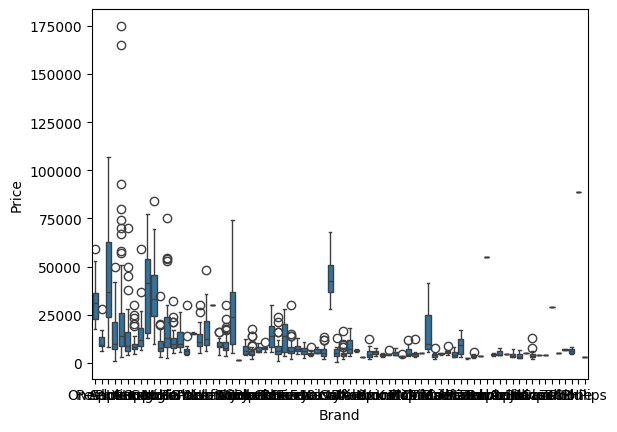

In [42]:
sns.boxplot(x="Brand", y="Price", data=phoneprices)

The box plot shows how prices vary based on different Brand. This shows that
Brabnd can be used as a feature for price


prediction.

<Axes: xlabel='Model', ylabel='Price'>

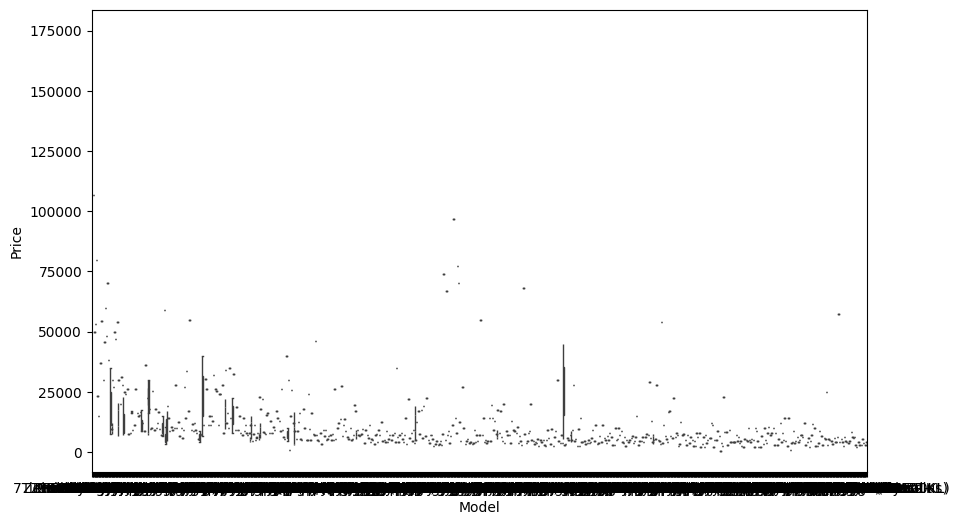

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Model", y="Price", data=phoneprices)

This plot shows Touchscreen types and how they affect the price. This feature can be used for prediction.

<Axes: xlabel='Touchscreen', ylabel='Price'>

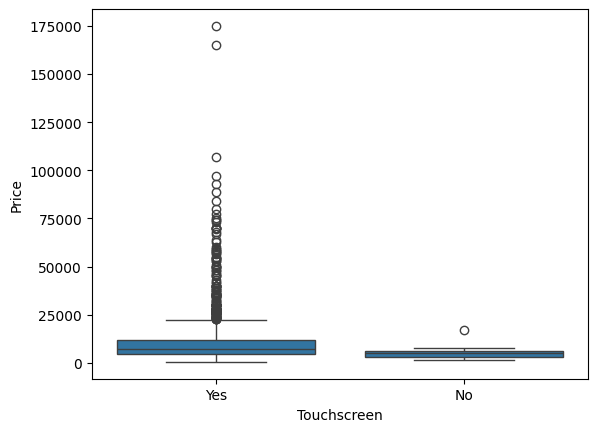

In [44]:
sns.boxplot(x="Touchscreen", y="Price", data=phoneprices)

The Operating system iullstrates that both types have almost a diffrent price range which bring price differences when prediction is created. Hence this feature is suitable for price prediction

<Axes: xlabel='operating_system', ylabel='Price'>

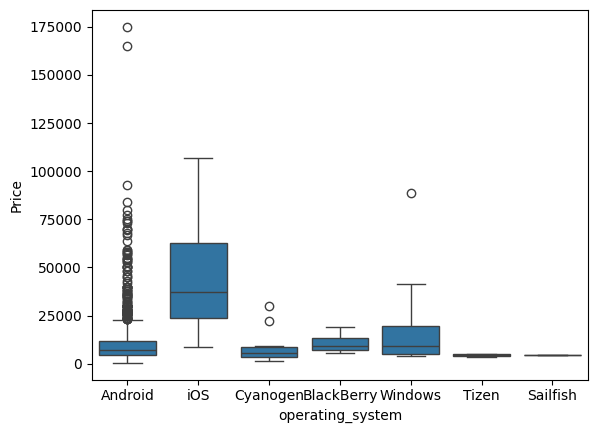

In [45]:
sns.boxplot(x="operating_system", y="Price", data=phoneprices)

The box plot below shows Wi-Fi categories with differing prices per type therefore this feature can be utilized for price prediction, it is significant though.

<Axes: xlabel='wifi', ylabel='Price'>

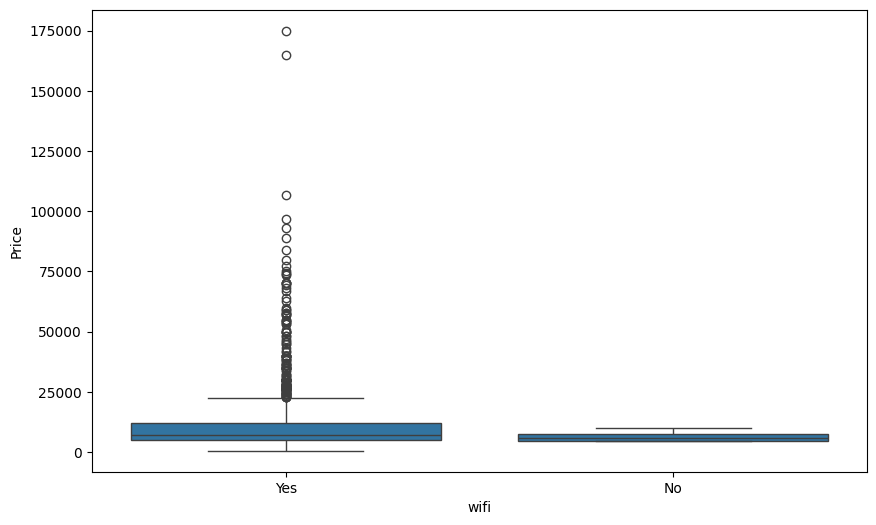

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="wifi", y="Price", data=phoneprices)

Has Bluetooth feature shows a huge difference in price ranges between phones with warrant and vice versa. This feature is very important for price prediction as the bigger the difference in range the better the feature.

<Axes: xlabel='Bluetooth', ylabel='Price'>

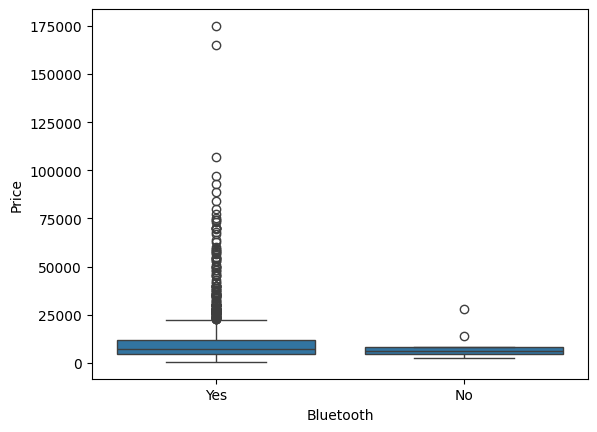

In [47]:
sns.boxplot(x="Bluetooth", y="Price", data=phoneprices)

This feature is similar to the feature above, all three categories have wider price ranges between one another. This feature is also crucial for price prediction.

<Axes: xlabel='GPS', ylabel='Price'>

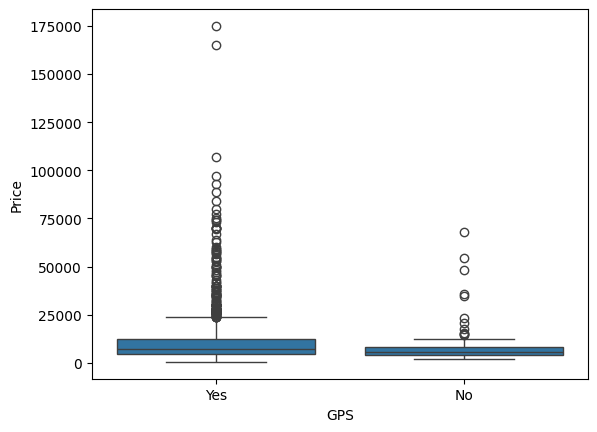

In [48]:
sns.boxplot(x="GPS", y="Price", data=phoneprices)

3G features has a **minimum price difference** while all drive shows a **greater difference** hence the feature can be used for prediction.

The box plot shows how prices vary based on different Names. This shows that
Model can be used as a feature for price


prediction.

<Axes: xlabel='Name', ylabel='Price'>

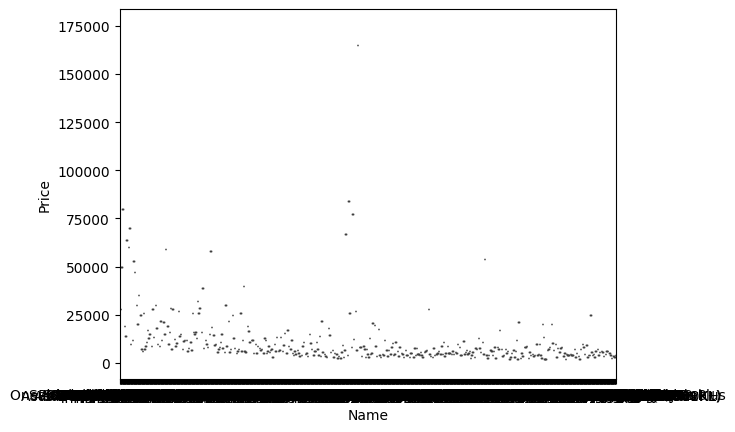

In [49]:
sns.boxplot(x="Name", y="Price", data=phoneprices)

<Axes: xlabel='threeg', ylabel='Price'>

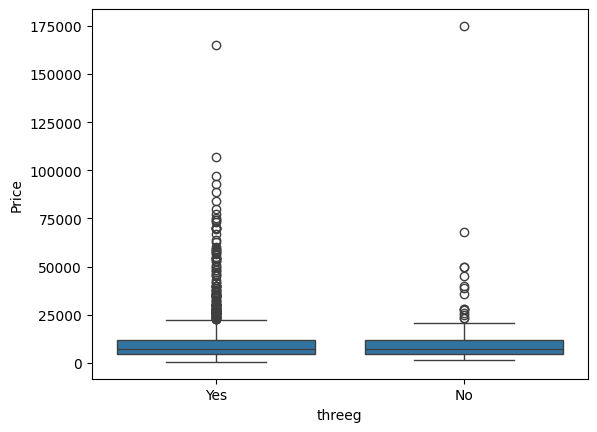

In [50]:
sns.boxplot(x="threeg", y="Price", data=phoneprices)

<Axes: xlabel='Rear camera', ylabel='Price'>

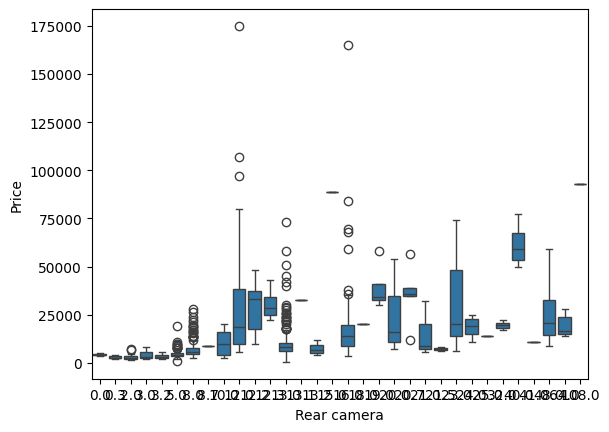

In [51]:
sns.boxplot(x="Rear camera", y="Price", data=phoneprices)

This plot shows Rear camera and how they affect the price. This feature can be used for prediction.


Data Transformation
Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

Data Preparation

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
phoneprices.Brand = labelencoder.fit_transform(phoneprices.Brand)
phoneprices.Name = labelencoder.fit_transform(phoneprices.Name)
phoneprices.Model = labelencoder.fit_transform(phoneprices.Model)
phoneprices.Touchscreen = labelencoder.fit_transform(phoneprices.Touchscreen)
phoneprices.operating_system = labelencoder.fit_transform(phoneprices.operating_system)
phoneprices.threeg = labelencoder.fit_transform(phoneprices.threeg)
phoneprices.fourg = labelencoder.fit_transform(phoneprices.fourg)
phoneprices.GPS = labelencoder.fit_transform(phoneprices.GPS)
phoneprices.Bluetooth = labelencoder.fit_transform(phoneprices.Bluetooth)
phoneprices.wifi = labelencoder.fit_transform(phoneprices.wifi)



Checking on the remaining features and if label encoding is applied to all categorical features

In [53]:
phoneprices.head(10)

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,operating_system,wifi,Bluetooth,GPS,Number of SIMs,threeg,fourg,Price
0,0,842,44,49,4085,6.67,1,1440,3120,8,...,48.0,16.0,0,1,1,1,2,1,1,58998
1,1,959,53,1142,4000,6.50,1,1080,2400,8,...,64.0,16.0,0,1,1,1,2,1,1,27999
2,2,1341,3,1288,3969,6.50,1,1242,2688,6,...,12.0,12.0,6,1,1,1,2,1,1,106900
3,3,1339,3,1286,3110,6.10,1,828,1792,6,...,12.0,12.0,6,1,1,1,2,1,1,62900
4,4,481,29,522,4000,6.40,1,1080,2340,8,...,12.0,32.0,0,1,1,1,1,0,0,49990
5,5,840,44,47,3800,6.55,1,1080,2400,8,...,48.0,16.0,0,1,1,0,2,1,1,34930
6,6,841,44,48,4085,6.67,1,1440,3120,8,...,48.0,16.0,0,1,1,1,2,1,1,52990
7,7,1038,54,584,4300,6.80,1,1440,3040,8,...,12.0,10.0,0,1,1,1,2,1,1,79699
8,8,34,5,936,6000,6.59,1,1080,2340,8,...,48.0,24.0,0,1,1,1,1,1,1,37999
9,9,1238,65,959,4000,6.39,1,1080,2340,8,...,48.0,20.0,0,1,1,1,2,0,0,23190


Review the remaining features & application of label encoding to all flat features .

"Data Transfornation" (normalization)
z-score used for raising down the features between the content of -1 & 1. This allows the standard to make more reasonable predictions as it is easy to comprehend.
The scaling is used for the training &  testing set. it use min & max normalization also

In [54]:
phoneprices = phoneprices.select_dtypes(include=[np.number])

In [55]:
# Calculate the z-score with scipy
import scipy.stats as stats
phoneprices = stats.zscore(phoneprices)


In [56]:
phoneprices

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,operating_system,wifi,Bluetooth,GPS,Number of SIMs,threeg,fourg,Price
0,-1.730777,0.415488,0.315405,-1.571822,1.313010,2.054345,0.112551,2.322392,2.921979,1.115270,...,4.016727,1.424097,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,3.431332
1,-1.728228,0.713722,0.784713,1.266172,1.215666,1.801033,0.112551,0.992052,1.630673,1.115270,...,5.805427,1.424097,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,1.193524
2,-1.725679,1.687444,-1.822555,1.645264,1.180164,1.801033,0.112551,1.590705,2.147195,0.204422,...,-0.007848,0.788484,6.326398,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,6.889363
3,-1.723130,1.682346,-1.822555,1.640071,0.196418,1.205005,0.112551,0.060815,0.540236,0.204422,...,-0.007848,0.788484,6.326398,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,3.713017
4,-1.720581,-0.504704,-0.466776,-0.343669,1.215666,1.652026,0.112551,0.992052,1.523064,1.115270,...,-0.007848,3.966552,-0.193502,0.076952,0.105644,0.293821,-2.227245,-2.893512,-1.707755,2.781048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1.720581,-0.968623,-0.779648,-1.314767,-1.647390,-1.924142,0.112551,-1.225180,-1.238897,-0.706427,...,-0.790404,-1.070686,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,-1.707755,-0.640094
1355,1.723130,1.213328,1.306166,-0.006122,-1.074779,-0.434072,0.112551,-1.225180,-1.142049,-0.706427,...,-0.455023,-0.323840,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,-1.707755,-0.615477
1356,1.725679,-0.774899,-0.779648,-1.117431,-1.418346,-1.179107,0.112551,-1.225180,-1.142049,-1.617276,...,-0.790404,-0.800550,-0.193502,0.076952,0.105644,-3.403430,0.444269,0.345601,-1.707755,-0.611218
1357,1.728228,1.674699,1.827620,-1.335539,-1.933696,-1.924142,0.112551,-1.225180,-1.238897,-2.072700,...,-1.125785,-1.070686,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,-1.707755,-0.647385


Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable

We have 22 actual columns [0-21 index]; 21 are predictor variables and 1 is the target variable

In [57]:
x_train=phoneprices.iloc[:,0:22]
y_train=phoneprices.iloc[:,11]

In [58]:
x_train.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,operating_system,wifi,Bluetooth,GPS,Number of SIMs,threeg,fourg,Price
0,-1.730777,0.415488,0.315405,-1.571822,1.313010,2.054345,0.112551,2.322392,2.921979,1.115270,...,4.016727,1.424097,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,3.431332
1,-1.728228,0.713722,0.784713,1.266172,1.215666,1.801033,0.112551,0.992052,1.630673,1.115270,...,5.805427,1.424097,-0.193502,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,1.193524
2,-1.725679,1.687444,-1.822555,1.645264,1.180164,1.801033,0.112551,1.590705,2.147195,0.204422,...,-0.007848,0.788484,6.326398,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,6.889363
3,-1.723130,1.682346,-1.822555,1.640071,0.196418,1.205005,0.112551,0.060815,0.540236,0.204422,...,-0.007848,0.788484,6.326398,0.076952,0.105644,0.293821,0.444269,0.345601,0.585564,3.713017
4,-1.720581,-0.504704,-0.466776,-0.343669,1.215666,1.652026,0.112551,0.992052,1.523064,1.115270,...,-0.007848,3.966552,-0.193502,0.076952,0.105644,0.293821,-2.227245,-2.893512,-1.707755,2.781048


In [59]:
y_train.head()

0    6.100856
1    0.902766
2    0.902766
3    0.902766
4    2.635462
Name: Internal storage (GB), dtype: float64

In [60]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data  # 30% for testing is used
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

## Fit Model
### Multiple Linear Regression
Calling multiple linear regression model and fitting the training set

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

Making price prediction using the testing set (Fit to MLR)

In [62]:
Y_pred_MLR = model_mlr.predict(X_test)


MLR Evaluation


Calculating the Mean Square Error for MLR model

In [63]:
mse_MLR = mean_squared_error(Y_test, Y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse_MLR)

The mean square error for Multiple Linear Regression:  4.623779101057605e-30


Calculating the Mean Absolute Error for

MLR model

In [64]:
mae_MLR= mean_absolute_error(Y_test, Y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae_MLR)

The mean absolute error for Multiple Linear Regression:  1.5205871692510817e-15


### Random Forest Regressor (checking other Models)
Calling the random forest model and fitting the training data

In [65]:
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(X_train,Y_train)

### Random Forest Evaluation


Calculating the Mean Square Error for Random Forest Model

In [72]:
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The mean square error of price and predicted value is: ', mse_RF)

The mean square error of price and predicted value is:  0.13017147866175774


Prediction of Phone prices using the testing data

In [69]:
Y_pred_RF = model_rf.predict(X_test)

### Random Forest Evaluation


Calculating the Mean Square Error for Random Forest Model

In [70]:
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The mean square error of price and predicted value is: ', mse_RF)

The mean square error of price and predicted value is:  0.13017147866175774


Calculating the Mean Absolute Error for
Random Forest Model

In [71]:
mae_RF= mean_absolute_error(Y_test, Y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae_RF)

The mean absolute error of price and predicted value is:  0.02345523446505281


### LASSO Model
Calling the model and fitting the training data

In [73]:
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,Y_train)

Price prediction uisng testing data

In [74]:
Y_pred_lasso = model_lm.predict(X_test)

### LASSO Evaluation  (checking another model)


In [75]:
mae_lasso= mean_absolute_error(Y_test, Y_pred_lasso)
print('The mean absolute error of price and predicted value is: ', mae_lasso)

The mean absolute error of price and predicted value is:  0.6302205192282053


Mean Squared Error for the LASSO Model

In [76]:
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print('The mean square error of price and predicted value is: ', mse_lasso)

The mean square error of price and predicted value is:  1.3118091973365733


In [77]:
scores = [('MLR', mae_MLR),
          ('Random Forest', mae_RF),
          ('LASSO', mae_lasso)
         ]

In [78]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,1.520587e-15
1,Random Forest,2.345523e-02
2,LASSO,6.302205e-01


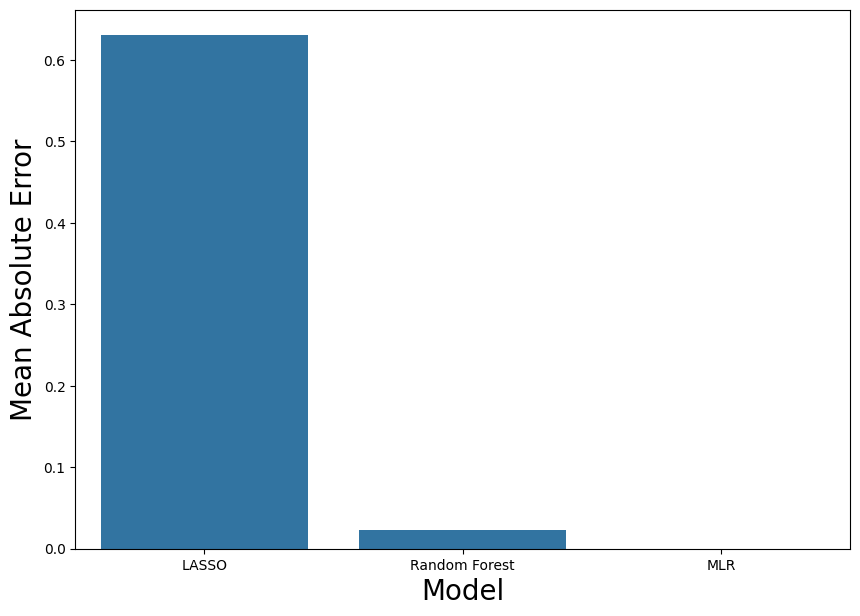

In [79]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

## Based on the MAE, it is concluded that the Random Forest is the best regression model for predicting the phone prices based on the given variables